In [49]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#Use grep to select the rows from larger dataset that have the procedure code(CPT4) for a caesarian section to limit the dataset to one specific procedure
caesarian_df = pd.read_csv('caesarian_data.csv', index_col=[0])
caesarian_df

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,1,22,NaN,G0202,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,2,22,NaN,77052,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016


In [3]:
#create new dataframe without claims that have '59510' in their claim number which aren't the right procedure  
caesarian_df2 = caesarian_df[caesarian_df['CPT4_ID'] == ('59510')]
caesarian_df2

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016
171175684,2,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171157745,1,99,NaN,59510,,,,,2016-02-08,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016


In [4]:
#Remove Columns that are redundant (i.e. descriptive of another column in the table) or contain only one value
edited_caesarian_df = caesarian_df2.drop(['Dental_Flag', 'Units', 'Rev_Cd', 'NDC_Cd', 'ER_Flag', 'Service_Start_Year', 'Unit_Of_Measure_Desc', 'Unit_Of_Measure_Cd'], axis=1)
edited_caesarian_df

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,,,,,
340993570,1,21,59510,,,,,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,1,21,59510,,,,,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,1,21,59510,UC,,,,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,1,21,59510,,,,,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,1,21,59510,,,,,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,2,21,59510,,,,,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,1,21,59510,,,,,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,2,21,59510,,,,,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,1,99,59510,,,,,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


In [5]:
#There are very few rows (<30 out of a DataFrame with 6200+ rows) with CPT4 modifications. For the first model, drop them to simplify the process
simplified_CPT4_df = edited_caesarian_df.drop(['CPT4_Mod1_Cd', 'CPT4_Mod2_Cd', 'CPT4_Mod3_Cd', 'CPT4_Mod4_Cd'], axis=1)
simplified_CPT4_df


,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,2,21,59510,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,1,21,59510,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,2,21,59510,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,1,99,59510,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


Feature Engineering To Do List

*Turn Capitation Y/N values into 1/0
*Make Date of Service a Time Stamp-> categorize as a weekend or not
*Turn Place of Service into a Categorical Feature (1-6)
*Add a column to turn the following into binary whether it's a numeric value or 0 to be used as a feature in linear regression:
*Coinsurance
*Prepaid
*Deductible
*CoPay


In [6]:
#use groupby to sum by Claim_ID for multiline claims
summed_charge_amt = simplified_CPT4_df.groupby(['Claim_ID'])['Charge_Amt'].sum()

In [7]:
#add as a column to DataFrame
simplified_CPT4_df['Charged_Amt_Total'] = summed_charge_amt

In [8]:
#create binary 
simplified_CPT4_df['Prepaid_or_not'] = (simplified_CPT4_df['Prepaid_Amt'] > 0).astype(int)
#Repeat for other columns
simplified_CPT4_df['Deductible_or_Not'] = (simplified_CPT4_df['Deductible_Amt'] >0).astype(int)
simplified_CPT4_df['Coinsurance_Amt'] = (simplified_CPT4_df['Coinsurance_Amt'] >0).astype(int)
simplified_CPT4_df['Copay_or_not'] = (simplified_CPT4_df['Copay_Amt'] >0).astype(int)
simplified_CPT4_df['Capitation_Flag_Binary'] = (simplified_CPT4_df['Capitation_Flag'] == 'Y').astype(int)
simplified_CPT4_df.head()

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary
Claim_ID,,,,,,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0


In [9]:
#Differentiate between weekends and non-weekends
is_saturday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 5
is_sunday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 6
is_weekend = is_saturday | is_sunday

In [10]:
is_weekend.astype(int)
simplified_CPT4_df['is_weekend'] = (is_weekend).astype(int)
simplified_CPT4_df.head()

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend
Claim_ID,,,,,,,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0


In [11]:
#Create categorical variable for Place_of_Service_Cd using a dictionary and replace method
simplified_CPT4_df.Place_of_Service_Cd.unique()


array([21, 99, 11, 23, 22, 12])

In [12]:
#(21)- Inpatient Hospital, (99)- other, (11)- Office, (23)- ER, (22)- On-campus Outpatient, (12)- Home

Place_of_Service_Categorical = {"Place_of_Service_Cd": {21: 1, 99: 2, 11: 3, 23: 4,
                                  22: 5, 12: 6 }}

In [29]:
simplified_CPT4_df['Place_of_Service_Cd'].value_counts()

1    6146
3      50
5      40
2       8
4       3
6       1
Name: Place_of_Service_Cd, dtype: int64

In [32]:
#There's only 8 rows where the Place_of_Service is not recorded or listed as other; Drop these
simplified2_df = simplified_CPT4_df[simplified_CPT4_df.Place_of_Service_Cd != 2]
simplified2_df['Place_of_Service_Cd'].value_counts()

1    6146
3      50
5      40
4       3
6       1
Name: Place_of_Service_Cd, dtype: int64

In [33]:
simplified_CPT4_df.replace(Place_of_Service_Categorical, inplace=True)
simplified_CPT4_df.head()


,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend
Claim_ID,,,,,,,,,,,,,,,,,
340993570,1,1,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0
350588632,1,1,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0
357047267,1,1,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0
340423363,1,1,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1
171159994,1,1,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0


FSM Initial Exploration of Features

Linear Regression Model

Use only one feature
Split the data into training/test sets
Split the target into training/test sets
Create a linear regression
Train the model using the training sets
Make predictions using the testing sets
Evaluate Coefficients
Plot outputs

In [34]:
simplified2_df.columns

Index(['Claim_Line_No', 'Place_of_Service_Cd', 'CPT4_ID', 'Service_Start_Dt',
       'Charge_Amt', 'Prepaid_Amt', 'Plan_Paid_Amt', 'Capitation_Flag',
       'Copay_Amt', 'Coinsurance_Amt', 'Deductible_Amt', 'Charged_Amt_Total',
       'Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend'],
      dtype='object')

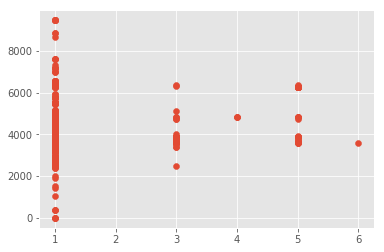

In [51]:
x = simplified2_df.Place_of_Service_Cd
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

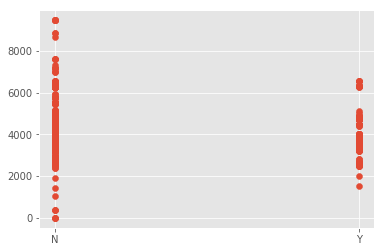

In [52]:
x = simplified2_df.Capitation_Flag
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

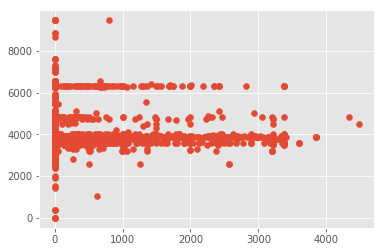

In [54]:
x = simplified2_df.Deductible_Amt
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

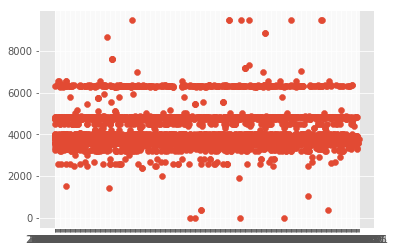

In [55]:
x = simplified2_df.Service_Start_Dt
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# make your data
X = simplified2_df.iloc[:, -9:-1] #iloc for taking the columns you want
y = simplified2_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [43]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(6240, 8)
(4680, 8)
(1560, 8)


In [45]:
X = simplified2_df.iloc[:, -4:] #iloc for taking the columns you want
y = simplified2_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [  63.9983277   132.63126015 -231.20560122   -8.26846219]
Mean squared error: 513347.01
Variance score: 0.01


ValueError: x and y must be the same size

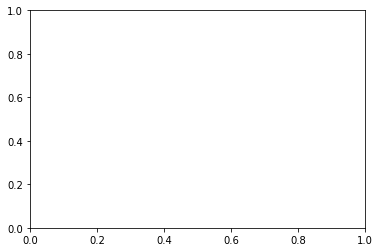

In [48]:
# #Plot outputs
# plt.scatter(X_test, y_test,  color='black')
# plt.plot(X_test, y_pred, color='blue', linewidth=3)

# plt.xticks(())
# plt.yticks(())

# plt.show()

In [39]:
list(zip(X.columns, regr.coef_))

[('Deductible_or_Not', 41.17607270402445),
 ('Copay_or_not', 160.60687441353244),
 ('Capitation_Flag_Binary', -229.86325927446214),
 ('is_weekend', 18.095918488903106)]

In [46]:
X = simplified2_df.loc[:, ['Place_of_Service_Cd', 'Capitation_Flag_Binary', 'Copay_or_not', 'is_weekend', 'Prepaid_or_not']] #loc for labels
y = simplified2_df.loc[:, 'Charged_Amt_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 196.90393183 -242.3466715    54.64512425  -25.59996123  -97.78894825]
Mean squared error: 530476.30
Variance score: 0.01


In [41]:
list(zip(X.columns, regr.coef_))

[('Place_of_Service_Cd', 175.0342676001043),
 ('Capitation_Flag_Binary', -306.8192177350666),
 ('Copay_or_not', 87.8747358283038),
 ('is_weekend', 36.78830521032589),
 ('Prepaid_or_not', -110.18797989357721)]